In [6]:
# Data manipulation(cleaning), Plot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
import nltk
from nltk.corpus import stopwords; # nltk.download('stopwords');
from nltk import tokenize
from nltk import pos_tag
from nltk.tokenize import word_tokenize; # nltk.download('punkt'); nltk.download('averaged_perceptron_tagger');
import re
from spellchecker import SpellChecker
from collections import Counter

# Prep ML - Split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVR

In [7]:
myDataset = pd.read_csv("../Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
myDataset.head(4)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**This dataset consists of 8 different datasets collected from different grades from 7th - 10th. Each dataset includes training and final sets with various lengths of words and prompts for the assignment. The rubric for each grade and assignment also varies, including Persuasive, Narrative, Expository, or Source-dependent assignments. These datasets were scored based on various criteria and the scoring for each grade and assignment varies, including resolved scores ranging from 2-12, 1-6, 0-3, and 0-30.**

1) Grade 8 - Persuasive, newspaper, 1785 training, 592 final, 350 words, (Score 1+2 = Resovled Score),Rubric 1-6, Resolved scoring 2-12 (Persuasive/ Narrative/Expository)

2) Grade 10 - Persuasive, censorship, 1800 training, 600 final, 350 words, (R1D1, R1D2, R2D1, R2D2, D1_resolved, D2_resolved), D1 1-6, D2 1-4 (Persuasive/ Narrative/Expository)

3) Grade 10 - Source, cyclist, 1726 training, 575 final, 150 words, (R1 + R2 = resolved cr score), Rubric 0-3 (source)

4) Grade 10  - Source, Saeng, 1772 training, 589 final, (R1 + R2 = resolved), Rubric 0-3 (source)

5) Grade 8  - Source, describe mood - source dependent, 1805 training, 601 final, 150 words, Score 1 + Score 2 = Final Score, Score 0-4 (source)

6) Grade 10  - Source, builders of empire bulilding, 1800 training, 600 final, 150 words, Score 1 + Score 2 = Final Score, Score 0-4 (source)

7) Grade 7  - Persuasive, patience, 1730 training, 578 final, 250 words, Rater1 + Rater2 = Resolved, Rubric 0-15, total 0-30 (resolved) (Persuasive/ Narrative/Expository)

8) Grade 10  - Persuasive, benefits of laughter, 918 training, 305 final, 650 words, Rater1+Rater2+Rater3 = Resolved, Rater 0-30, resolved 0-60 (see doc (Persuasive/ Narrative/Expository)

In [8]:
# This line of code filters the dataset to only include entries with an essay set of 1 or 7.
myDataset = myDataset[(myDataset.essay_set == 2) | (myDataset.essay_set == 8)]
print(myDataset.head(2),myDataset.tail(2))

      essay_id  essay_set                                              essay  \
1783      2978          2  Certain materials being removed from libraries...   
1784      2979          2  Write a persuasive essay to a newspaper reflec...   

      rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
1783               4               4             NaN              4   
1784               1               2             NaN              1   

      rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
1783             4.0             4.0            4.0  ...            NaN   
1784             1.0             2.0            1.0  ...            NaN   

      rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  \
1783            NaN            NaN            NaN            NaN   
1784            NaN            NaN            NaN            NaN   

      rater3_trait2  rater3_trait3  rater3_trait4  rater3_trait5  \
1783            NaN            NaN            

In [9]:
# Dropna() is a pandas function that is used to remove missing values (NaN) from a pandas dataframe or series.
myDataset.dropna(axis=1,inplace=True)

In [10]:
# Count of Types of essays inside training dataset
print(myDataset['essay_set'].value_counts(), myDataset)

2    1800
8     723
Name: essay_set, dtype: int64        essay_id  essay_set                                              essay  \
1783       2978          2  Certain materials being removed from libraries...   
1784       2979          2  Write a persuasive essay to a newspaper reflec...   
1785       2980          2  Do you think that libraries should remove cert...   
1786       2981          2  In @DATE1's world, there are many things found...   
1787       2982          2  In life you have the 'offensive things'. The l...   
...         ...        ...                                                ...   
12971     21626          8   In most stories mothers and daughters are eit...   
12972     21628          8   I never understood the meaning laughter is th...   
12973     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12974     21630          8                                 Trippin' on fen...   
12975     21633          8   Many people believe that laugh

In [11]:
myDataset.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [12]:
temp = myDataset[(myDataset.essay_set == 2)]
print(min(temp['domain1_score']),'-', max(temp['domain1_score']))

1 - 6


In [13]:
temp = myDataset[(myDataset.essay_set == 8)]
print(min(temp['domain1_score']),'-', max(temp['domain1_score']))

10 - 60


In [14]:
myDataset['essay_set'].mask(myDataset['essay_set'] == 2 ,1, inplace=True)
myDataset['essay_set'].mask(myDataset['essay_set'] == 8 ,2, inplace=True)

In [15]:
myDataset

,essay_id,essay_set,essay,domain1_score
1783,2978,1,Certain materials being removed from libraries...,4
1784,2979,1,Write a persuasive essay to a newspaper reflec...,1
1785,2980,1,Do you think that libraries should remove cert...,2
1786,2981,1,"In @DATE1's world, there are many things found...",4
1787,2982,1,In life you have the 'offensive things'. The l...,4
...,...,...,...,...
12971,21626,2,In most stories mothers and daughters are eit...,35
12972,21628,2,I never understood the meaning laughter is th...,32
12973,21629,2,"When you laugh, is @CAPS5 out of habit, or is ...",40
12974,21630,2,Trippin' on fen...,40


In [16]:
temp = myDataset[(myDataset.essay_set == 2)]
print(min(temp['domain1_score']),'-', max(temp['domain1_score']))

10 - 60


**Normalization** is used to adjust values such as weights, balances, and other measures to a specific scale. For example, it can be used to adjust scores into a range of 0-100. This helps in comparing different variables on the same scale.

In [17]:
#Normalizing all of the essays according to the marking scheme found in the dataset.
min_range = [0,0]
max_range = [6,60]

# This code creates a function called "normalize" that takes as parameters "x", "mi", and "ma". 
# The function normalizes the value of "x" between 0 and 10, by subtracting the "mi" value from "x",
#  then dividing that by the difference between "ma" and "mi". 
# The result is then rounded and the function returns it.
def normalize(x,mi,ma):
    print("Before Normalization: "+str(x))
    # This is a formula that can be used to normalize a number in the range of 0 to 1. 
    # x is the input number, mi is the minimum possible value for the range, and ma is the maximum possible value
    #  for the range. After this formula is applied, the output number will be between 0 (for x = mi) 
    # and 1 (for x = ma).
    x = (x-mi)/(ma-mi)
    print("After Normalization : "+str(round(x*10)))
    return round(x*10)
    # 8 
    # (8 - 2)/(12-2)
    # 6/10
    # 0.6
    # (22- 2)/(30-2)
    # 20/28

#Saving normalization inside a new colomn
myDataset['normalized_score']=myDataset.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

Before Normalization: 4
After Normalization : 7
Before Normalization: 1
After Normalization : 2
Before Normalization: 2
After Normalization : 3
Before Normalization: 4
After Normalization : 7
Before Normalization: 4
After Normalization : 7
Before Normalization: 4
After Normalization : 7
Before Normalization: 5
After Normalization : 8
Before Normalization: 2
After Normalization : 3
Before Normalization: 4
After Normalization : 7
Before Normalization: 4
After Normalization : 7
Before Normalization: 3
After Normalization : 5
Before Normalization: 3
After Normalization : 5
Before Normalization: 5
After Normalization : 8
Before Normalization: 3
After Normalization : 5
Before Normalization: 3
After Normalization : 5
Before Normalization: 3
After Normalization : 5
Before Normalization: 4
After Normalization : 7
Before Normalization: 3
After Normalization : 5
Before Normalization: 1
After Normalization : 2
Before Normalization: 3
After Normalization : 5
Before Normalization: 3
After Normalizat

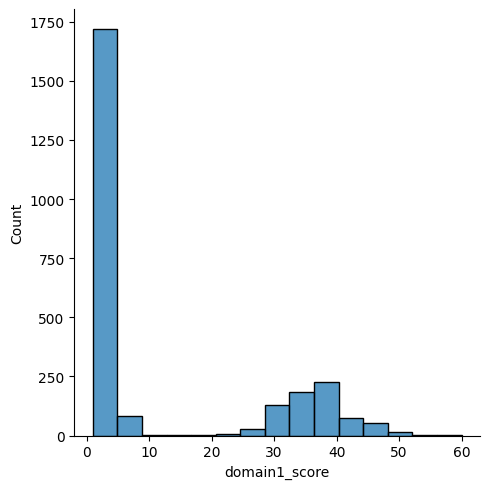

In [18]:
sns.displot(myDataset['domain1_score'])

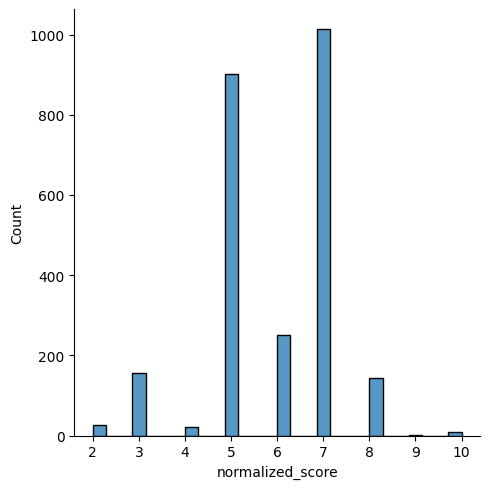

In [19]:
sns.displot(myDataset['normalized_score'])

In [20]:
myDataset

,essay_id,essay_set,essay,domain1_score,normalized_score
1783,2978,1,Certain materials being removed from libraries...,4,7
1784,2979,1,Write a persuasive essay to a newspaper reflec...,1,2
1785,2980,1,Do you think that libraries should remove cert...,2,3
1786,2981,1,"In @DATE1's world, there are many things found...",4,7
1787,2982,1,In life you have the 'offensive things'. The l...,4,7
...,...,...,...,...,...
12971,21626,2,In most stories mothers and daughters are eit...,35,6
12972,21628,2,I never understood the meaning laughter is th...,32,5
12973,21629,2,"When you laugh, is @CAPS5 out of habit, or is ...",40,7
12974,21630,2,Trippin' on fen...,40,7


In [21]:
# Removing domain score because depending on the essay_set it the score differs from each other
myDataset.drop('domain1_score',axis=1,inplace=True)

**Pre-processing** (also known as data preprocessing) is a data mining technique that involves transforming raw data into an understandable format. This process helps to reduce the errors in the data and make it more useful for predictive modeling. Pre-processing includes cleaning, formatting, imputing missing values, feature selection and creating new features.

In [22]:
# Performing Pre-processing on the essays by removing the word after @

def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

myDataset['essay'] = myDataset['essay'].apply(lambda x:clean_essay(x))

In [23]:
myDataset.head(2)

,essay_id,essay_set,essay,normalized_score
1783,2978,1,Certain materials being removed from libraries...,7
1784,2979,1,Write a persuasive essay to a newspaper reflec...,2


**Stopwords** from NLTK are words that have very little meaning and are usually removed from text before further natural language processing. These words are often very frequent in text, so removing them can reduce the size of documents and speed up processing. Examples of stopwords are “a”, “an”, and “the”.

In [24]:
# Removing Stop words from the essays
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)
myDataset['clean_essay'] = myDataset['essay'].apply(lambda x:remove_stop_words(x))

In [25]:
myDataset.head(2)

,essay_id,essay_set,essay,normalized_score,clean_essay
1783,2978,1,Certain materials being removed from libraries...,7,"Certain materials removed libraries books , mu..."
1784,2979,1,Write a persuasive essay to a newspaper reflec...,2,Write persuasive essay newspaper reflecting vi...


By using **regular expressions**, a person can limit the results to matching specific patterns and exclude those that do not match.

In [26]:
# By using regular expression to remove characters that are not A-Z, a-z, or a space from an essay
# This used to remove, special characters, or other extraneous characters that may be present in an essay - Code Injection

def remove_puncs(essay):
    essay = re.sub("[^A-Za-z,.! ]","",essay)
    return essay

myDataset['clean_essay'] = myDataset['clean_essay'].apply(lambda x:remove_puncs(x))
# Convert to lower str
myDataset['clean_essay'] = myDataset['clean_essay'].str.lower()

In [27]:
myDataset.head(2)

,essay_id,essay_set,essay,normalized_score,clean_essay
1783,2978,1,Certain materials being removed from libraries...,7,"certain materials removed libraries books , mu..."
1784,2979,1,Write a persuasive essay to a newspaper reflec...,2,write persuasive essay newspaper reflecting vi...


In [28]:
# sentence_2_word removes punctuation from a sentence and tokenizes it into individual word
def sentence_2_word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

# essay2word takes an essay as input, strips all of the white space, 
# tokenizes the essay using the NLTK library, creates a list of words, 
# and then returns the list of words. The sent2word() function essentially turns sentences from the essay into words.
# example My name is Arslan to ('My','Name','is','Arslan')
def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sentence_2_word(i))
    return final_words

# check_spell_error checks for spelling errors in an essay. It does this by removing any punctuation or numbers from the essay and splitting the essay into separate words. 
# It then checks if each word is present in a list of words (lowecased). If the word is not present, the count of the spelling errors is incremented by one. 
# Finally, the number of spelling errors is returned.
def spell_check_count(essay):
    spell = SpellChecker()
    essay=essay.lower()
    count = 0
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    all_words = new_essay.split()
    # find those words that may be misspelled
    count = len(list(spell.unknown(all_words)))
    return count

# returns the number of words in the essay
def no_of_words(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

# The function will go through each word in the essay, 
# count the number of characters in each word, 
# and then return the total count of all the characters combined.
def no_of_char(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

# avg_word_len calculates the average length of words in an essay. 
# It takes in an essay as an argument, then returns the number of characters divided by the number of words in the essay.
def avg_word_len(essay):
    return no_of_char(essay)/no_of_words(essay)

# sentences_count takes in an essay as an argument and returns the number of sentences in the essay by counting the number of words in the argument.
def sentences_count(essay):
    return len(essay2word(essay))


##  ** OLD METHOD ** ** OLD METHOD ** ** OLD METHOD ** ** OLD METHOD ** ** OLD METHOD **
# counts the number of nouns, verbs, adjectives, and adverbs in a given essay in the text file
# data = open('nouns.txt').read()
# nouns = re.findall('[a-z]+', data.lower())
# data = open('adjectives.txt').read()
# adjectives = re.findall('[a-z]+', data.lower())
# data = open('adverts.txt').read()
# adverts = re.findall('[a-z]+', data.lower())
# data = open('verbs.txt').read()
# verbs = re.findall('[a-z]+', data.lower())
# def count_nouns(essay):
#     essay=essay.lower()
#     new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
#     new_essay = re.sub("[0-9]","",new_essay)
#     count=0
#     all_words = new_essay.split()
#     for i in all_words:
#         if i in nouns:
#             count+=1
#     return count
# def count_adjectives(essay):
#     essay=essay.lower()
#     new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
#     new_essay = re.sub("[0-9]","",new_essay)
#     count=0
#     all_words = new_essay.split()
#     for i in all_words:
#         if i in adjectives:
#             count+=1
#     return count
# def count_adverts(essay):
#     essay=essay.lower()
#     new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
#     new_essay = re.sub("[0-9]","",new_essay)
#     count=0
#     all_words = new_essay.split()
#     for i in all_words:
#         if i in adverts:
#             count+=1
#     return count
# def count_verbs(essay):
#     essay=essay.lower()
#     new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
#     new_essay = re.sub("[0-9]","",new_essay)
#     count=0
#     all_words = new_essay.split()
#     for i in all_words:
#         if i in verbs:
#             count+=1
#     return count

def count_nouns(essay):
    sentences = essay2word(essay)
    noun_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
    return noun_count
def count_adjectives(essay):
    sentences = essay2word(essay)
    adj_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='J'):
                adj_count+=1
    return adj_count
def count_verbs(essay):
    sentences = essay2word(essay)
    verb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='V'):
                verb_count+=1
    return verb_count
def count_adverts(essay):
    sentences = essay2word(essay)
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='R'):
                adverb_count+=1
    return adverb_count
def count_pronoun(essay):
    sentences = essay2word(essay)
    c=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='PRP'):
                c+=1
                print(c)
    return c
def count_determiner(essay):
    sentences = essay2word(essay)
    c=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='DT'):
                c+=1
                print(c)
    return c
def count_preposition(essay):
    sentences = essay2word(essay)
    c=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='IN'):
                c+=1
                print(c)

    return c
def count_conjunction(essay):
    sentences = essay2word(essay)
    c=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='CC'):
                c+=1
                print(c)
    return c
def count_interjection(essay):
    sentences = essay2word(essay)
    c=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='U'):
                c+=1
                print(c)
    return c



data = open('my500.txt').read()
my500 = re.findall('[a-z]+', data.lower())
def count_my500(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i in my500:
            count+=1
    return count
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z.!? ]","",essay)
    return essay
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

**Part of Speech Tagging** (PoS tagging) means identifying each token’s part of speech (noun, adverb, adjective, etc.) and then tagging it as such. 

In [29]:
import spacy # python3 -m spacy download en_core_web_lg
#load the large English model
nlp = spacy.load("en_core_web_lg")
 
#list to store the tokens and pos tags 
token = []
pos = []
 
for sent in nlp.pipe(myDataset['essay']):
    if sent.has_annotation('DEP'):
        #add the tokens present in the sentence to the token list
        token.append([word.text for word in sent])
        #add the pos tage for each token to the pos list
        pos.append([word.pos_ for word in sent])

In [30]:
data = open('myBook.txt').read()
book = re.findall('[a-z]+', data.lower())
def count_books(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i in book:
            count+=1
    return count

**Entity recognition** (also known as Named Entity Recognition, or NER) is the process of extracting specific pieces of information from text data. This often includes identifying key entities such as names, places, organizations, and more. Entity recognition can be used in a variety of different applications such as language processing, text mining, and information retrieval. Entity recognition can be achieved through a variety of different methods, with machine learning being a popular choice.

In [31]:
import spacy # python3 -m spacy download en_core_web_lg
#load the large English model
nlp = spacy.load("en_core_web_lg")

def entity_recognition_ORG(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "ORG":
            c += 1;
    return c
def entity_recognition_PERSON(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            c += 1;
    return c
def entity_recognition_NORP(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "NORP":
            c += 1;
    return c
def entity_recognition_FAC(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "FAC":
            c += 1;
    return c
def entity_recognition_GPE(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "GPE":
            c += 1;
    return c

def entity_recognition_LOC(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "LOC":
            c += 1;
    return c
def entity_recognition_PRODUCT(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "PRODUCT":
            c += 1;
    return c
def entity_recognition_EVENT(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "EVENT":
            c += 1;
    return c
def entity_recognition_WORK_OF_ART(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "WORK_OF_ART":
            c += 1;
    return c
def entity_recognition_DATE(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "DATE":
            c += 1;
    return c
def entity_recognition_QUANTITY(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "QUANTITY":
            c += 1;
    return c
def entity_recognition_CARDINAL(essay):
    doc = nlp(essay)
    c=0;
    for ent in doc.ents:
        if ent.label_ == "CARDINAL":
            c += 1;
    return c

In [32]:
myFeatures = myDataset.copy()
myFeatures['pos'] = pos

In [33]:
# This is a feature engineering technique that creates new columns for a data frame. 
# Specifically, this code creates a new column for each part of speech tag in the pos column of the data frame, 
# and counts the number of occurrences of each part of speech tag in each row.
# counting the number of a specific pos tag in each sentence 
# (in the 'pos' col) and adding a new col for it in the df 
myFeatures['adjective'] = myFeatures.apply(lambda x: x['pos'].count('ADJ'), axis=1)
myFeatures['adposition'] = myFeatures.apply(lambda x: x['pos'].count('ADP'), axis=1)
myFeatures['adverb'] = myFeatures.apply(lambda x: x['pos'].count('ADV'), axis=1)
myFeatures['auxiliary'] = myFeatures.apply(lambda x: x['pos'].count('AUX'), axis=1)
myFeatures['conjunction'] = myFeatures.apply(lambda x: x['pos'].count('CONJ'), axis=1)
myFeatures['determiner'] = myFeatures.apply(lambda x: x['pos'].count('DET'), axis=1)
myFeatures['interjection'] = myFeatures.apply(lambda x: x['pos'].count('INTJ'), axis=1)
myFeatures['noun'] = myFeatures.apply(lambda x: x['pos'].count('NOUN'), axis=1)
myFeatures['pronoun'] = myFeatures.apply(lambda x: x['pos'].count('PRON'), axis=1)
myFeatures['proper-noun'] = myFeatures.apply(lambda x: x['pos'].count('PROPN'), axis=1)
myFeatures['punctuation'] = myFeatures.apply(lambda x: x['pos'].count('PUNCT'), axis=1)
myFeatures['verb'] = myFeatures.apply(lambda x: x['pos'].count('VERB'), axis=1)


In [34]:
# feature engineering techniques - 22 mins
myFeatures['entity_recognition_ORG'] = myFeatures['essay'].apply(entity_recognition_ORG)
myFeatures['entity_recognition_PERSON'] = myFeatures['essay'].apply(entity_recognition_PERSON)
myFeatures['entity_recognition_NORP'] = myFeatures['clean_essay'].apply(entity_recognition_NORP)
myFeatures['entity_recognition_FAC'] = myFeatures['essay'].apply(entity_recognition_FAC)
myFeatures['entity_recognition_GPE'] = myFeatures['essay'].apply(entity_recognition_GPE)
myFeatures['entity_recognition_LOC'] = myFeatures['essay'].apply(entity_recognition_LOC)
myFeatures['entity_recognition_PRODUCT'] = myFeatures['essay'].apply(entity_recognition_PRODUCT)
myFeatures['entity_recognition_EVENT'] = myFeatures['essay'].apply(entity_recognition_EVENT)
myFeatures['entity_recognition_WORK_OF_ART'] = myFeatures['essay'].apply(entity_recognition_WORK_OF_ART)
myFeatures['entity_recognition_DATE'] = myFeatures['essay'].apply(entity_recognition_DATE)
myFeatures['entity_recognition_QUANTITY'] = myFeatures['essay'].apply(entity_recognition_QUANTITY)
myFeatures['entity_recognition_CARDINAL'] = myFeatures['essay'].apply(entity_recognition_CARDINAL)

In [ ]:
# feature engineering techniques
myFeatures['ebooks'] = myFeatures['clean_essay'].apply(count_books)
myFeatures['Sat500'] = myFeatures['essay'].apply(count_my500)
myFeatures['char_count'] = myFeatures['essay'].apply(no_of_char)
myFeatures['word_count'] = myFeatures['essay'].apply(no_of_words)
myFeatures['sentences_count'] = myFeatures['essay'].apply(sentences_count)
myFeatures['spelling_mistake_count'] = myFeatures['essay'].apply(spell_check_count)
myFeatures['avg_word_len'] = myFeatures['essay'].apply(avg_word_len)

In [ ]:
myFeatures

,essay_id,essay_set,essay,normalized_score,clean_essay,pos,adjective,adposition,adverb,auxiliary,...,entity_recognition_DATE,entity_recognition_QUANTITY,entity_recognition_CARDINAL,ebooks,Sat500,char_count,word_count,sentences_count,spelling_mistake_count,avg_word_len
1783,2978,1,Certain materials being removed from libraries...,6,"certain materials removed libraries books , mu...","[ADJ, NOUN, AUX, VERB, ADP, NOUN, ADJ, ADP, NO...",31,39,31,31,...,1,0,0,217,24,1999,470,17,4,4.253191
1784,2979,1,Write a persuasive essay to a newspaper reflec...,0,write persuasive essay newspaper reflecting vi...,"[VERB, DET, ADJ, NOUN, ADP, DET, NOUN, VERB, P...",9,7,4,16,...,0,0,0,53,14,636,167,3,7,3.808383
1785,2980,1,Do you think that libraries should remove cert...,2,do think libraries remove certain materials sh...,"[AUX, PRON, VERB, SCONJ, NOUN, AUX, VERB, ADJ,...",12,16,12,15,...,0,0,0,100,17,864,222,15,5,3.891892
1786,2981,1,"In world, there are many things found offensiv...",6,"in world , many things found offensive . every...","[ADP, NOUN, PUNCT, PRON, VERB, ADJ, NOUN, VERB...",25,33,22,61,...,0,0,1,225,32,2115,468,31,2,4.519231
1787,2982,1,In life you have the 'offensive things'. The l...,6,in life offensive things . the little stuff g...,"[ADP, NOUN, PRON, VERB, DET, PUNCT, ADJ, NOUN,...",26,31,22,34,...,0,0,2,211,21,1814,429,35,12,4.228438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,2,In most stories mothers and daughters are eith...,5,in stories mothers daughters either enemies fr...,"[ADP, ADJ, NOUN, NOUN, CCONJ, NOUN, AUX, CCONJ...",40,70,62,72,...,5,0,9,393,48,3133,810,26,5,3.867901
12972,21628,2,I never understood the meaning laughter is the...,4,i never understood meaning laughter shortest d...,"[PRON, ADV, VERB, DET, NOUN, NOUN, AUX, DET, A...",33,52,49,34,...,4,0,4,243,29,1970,526,31,3,3.745247
12973,21629,2,"When you laugh, is out of habit, or is cause? ...",6,"when laugh , habit , cause what causes laughi...","[SCONJ, PRON, VERB, PUNCT, AUX, ADP, ADP, NOUN...",37,96,58,64,...,6,0,5,355,57,3256,781,40,10,4.169014
12974,21630,2,"Trippin' on fences I am years young, and in th...",6,"trippin fences i years young , short years , ...","[PROPN, PUNCT, ADP, NOUN, PRON, AUX, NOUN, ADJ...",40,62,53,50,...,3,0,3,256,36,2185,556,36,6,3.929856


In [ ]:
myFeatures.drop(columns=['pos','essay_id','essay_set'],inplace=True,axis=1)
myFeatures

,essay,normalized_score,clean_essay,adjective,adposition,adverb,auxiliary,conjunction,determiner,interjection,...,entity_recognition_DATE,entity_recognition_QUANTITY,entity_recognition_CARDINAL,ebooks,Sat500,char_count,word_count,sentences_count,spelling_mistake_count,avg_word_len
1783,Certain materials being removed from libraries...,6,"certain materials removed libraries books , mu...",31,39,31,31,0,37,0,...,1,0,0,217,24,1999,470,17,4,4.253191
1784,Write a persuasive essay to a newspaper reflec...,0,write persuasive essay newspaper reflecting vi...,9,7,4,16,0,12,10,...,0,0,0,53,14,636,167,3,7,3.808383
1785,Do you think that libraries should remove cert...,2,do think libraries remove certain materials sh...,12,16,12,15,0,24,1,...,0,0,0,100,17,864,222,15,5,3.891892
1786,"In world, there are many things found offensiv...",6,"in world , many things found offensive . every...",25,33,22,61,0,42,0,...,0,0,1,225,32,2115,468,31,2,4.519231
1787,In life you have the 'offensive things'. The l...,6,in life offensive things . the little stuff g...,26,31,22,34,0,39,5,...,0,0,2,211,21,1814,429,35,12,4.228438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,In most stories mothers and daughters are eith...,5,in stories mothers daughters either enemies fr...,40,70,62,72,0,49,2,...,5,0,9,393,48,3133,810,26,5,3.867901
12972,I never understood the meaning laughter is the...,4,i never understood meaning laughter shortest d...,33,52,49,34,0,46,1,...,4,0,4,243,29,1970,526,31,3,3.745247
12973,"When you laugh, is out of habit, or is cause? ...",6,"when laugh , habit , cause what causes laughi...",37,96,58,64,0,74,1,...,6,0,5,355,57,3256,781,40,10,4.169014
12974,"Trippin' on fences I am years young, and in th...",6,"trippin fences i years young , short years , ...",40,62,53,50,0,39,1,...,3,0,3,256,36,2185,556,36,6,3.929856


In [ ]:
## # Creates a CSV file of the DataFrame myFeatures.
myFeatures.to_csv("myFeaturesUpper.csv")

In [ ]:
# It then reads the CSV file and drops the 'Unnamed: 0' column. 
# The head() function then displays the first five rows of the DataFrame.

# Data manipulation(cleaning), Plot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
import nltk
from nltk.corpus import stopwords; # nltk.download('stopwords');
from nltk import tokenize
from nltk import pos_tag
from nltk.tokenize import word_tokenize; # nltk.download('punkt'); nltk.download('averaged_perceptron_tagger');
import re
from spellchecker import SpellChecker
from collections import Counter

# Prep ML - Split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVR

myDataset = pd.read_csv("myFeaturesUpper.csv")
myDataset.drop('Unnamed: 0',inplace=True,axis=1)
myDataset.head()

,essay,normalized_score,clean_essay,adjective,adposition,adverb,auxiliary,conjunction,determiner,interjection,...,entity_recognition_DATE,entity_recognition_QUANTITY,entity_recognition_CARDINAL,ebooks,Sat500,char_count,word_count,sentences_count,spelling_mistake_count,avg_word_len
0,Certain materials being removed from libraries...,6,"certain materials removed libraries books , mu...",31,39,31,31,0,37,0,...,1,0,0,217,24,1999,470,17,4,4.253191
1,Write a persuasive essay to a newspaper reflec...,0,write persuasive essay newspaper reflecting vi...,9,7,4,16,0,12,10,...,0,0,0,53,14,636,167,3,7,3.808383
2,Do you think that libraries should remove cert...,2,do think libraries remove certain materials sh...,12,16,12,15,0,24,1,...,0,0,0,100,17,864,222,15,5,3.891892
3,"In world, there are many things found offensiv...",6,"in world , many things found offensive . every...",25,33,22,61,0,42,0,...,0,0,1,225,32,2115,468,31,2,4.519231
4,In life you have the 'offensive things'. The l...,6,in life offensive things . the little stuff g...,26,31,22,34,0,39,5,...,0,0,2,211,21,1814,429,35,12,4.228438


**Count Vectorization (AKA One-Hot Encoding)** is a method of feature engineering where text documents are converted into matrix representations such that each row represents a document and each column represents a distinct word in the vocabulary. The values stored within each column record the frequency of the word within the corresponding document. This technique is extremely useful for feature engineering within text analysis, machine learning and natural language processing applications.

In [ ]:
# stopwords = a an I (small words) ngram_range = range of wards in the vector like two words together | max_features to limit train set
# For creation of the transformer only
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,3)) # ,max_features=21000
cv = vectorizer.fit_transform(myDataset['clean_essay'])
X = cv.toarray()
cv = 0; # Too free up ram
pickle.dump(vectorizer,open("Models/vectorizerUpper",'wb')) # Save
vocab = vectorizer.vocabulary_
vocab

{'certain': 83870,
 'materials': 337299,
 'removed': 463877,
 'libraries': 290235,
 'books': 54331,
 'music': 360004,
 'magazines': 326896,
 'nt': 372909,
 'gives': 198163,
 'people': 405067,
 'chance': 85815,
 'understand': 592593,
 'real': 452542,
 'world': 628220,
 'having': 223489,
 'definitly': 129729,
 'bad': 30531,
 'statement': 528574,
 'book': 48794,
 'lyrics': 325210,
 'song': 518052,
 'help': 227254,
 'person': 414524,
 'avoid': 27216,
 'type': 590467,
 'thing': 557915,
 'saying': 483982,
 'reader': 449649,
 'listener': 310972,
 'try': 587042,
 'doubt': 142062,
 'hear': 224741,
 'say': 481768,
 'band': 33262,
 'talks': 548962,
 'drugs': 144460,
 'cursing': 120725,
 'really': 453872,
 'talking': 548203,
 'mans': 334754,
 'life': 298432,
 'turns': 589938,
 'drug': 144349,
 'addict': 5488,
 'best': 41555,
 'live': 313782,
 'doubted': 142135,
 'gave': 193629,
 'example': 158240,
 'caps': 72453,
 'addicts': 5526,
 'homeless': 233824,
 'born': 61463,
 'disfigured': 137833,
 'arms'

In [ ]:
# Used to load previously made transformer
vectorizer = pickle.load(open("Models/vectorizerUpper",'rb'))
X = vectorizer.transform(myDataset['clean_essay'])
X = X.toarray()
vocab = vectorizer.vocabulary_
vocab

{'certain': 83870,
 'materials': 337299,
 'removed': 463877,
 'libraries': 290235,
 'books': 54331,
 'music': 360004,
 'magazines': 326896,
 'nt': 372909,
 'gives': 198163,
 'people': 405067,
 'chance': 85815,
 'understand': 592593,
 'real': 452542,
 'world': 628220,
 'having': 223489,
 'definitly': 129729,
 'bad': 30531,
 'statement': 528574,
 'book': 48794,
 'lyrics': 325210,
 'song': 518052,
 'help': 227254,
 'person': 414524,
 'avoid': 27216,
 'type': 590467,
 'thing': 557915,
 'saying': 483982,
 'reader': 449649,
 'listener': 310972,
 'try': 587042,
 'doubt': 142062,
 'hear': 224741,
 'say': 481768,
 'band': 33262,
 'talks': 548962,
 'drugs': 144460,
 'cursing': 120725,
 'really': 453872,
 'talking': 548203,
 'mans': 334754,
 'life': 298432,
 'turns': 589938,
 'drug': 144349,
 'addict': 5488,
 'best': 41555,
 'live': 313782,
 'doubted': 142135,
 'gave': 193629,
 'example': 158240,
 'caps': 72453,
 'addicts': 5526,
 'homeless': 233824,
 'born': 61463,
 'disfigured': 137833,
 'arms'

This code is extracting the values of the "normalized_score" column from the myDataset dataframe and assigning them to the variable Y. Then, it is concatenating the data from columns 3 to the end. After the concatenation, it prints the result of the X and Y assignments.

In [ ]:
Y = myDataset['normalized_score'].values
X = np.concatenate((myDataset.iloc[:, 3:], X), axis = 1)
print("My X", X, "My Y: ", Y)

My X [[31. 39. 31. ...  0.  0.  0.]
 [ 9.  7.  4. ...  0.  0.  0.]
 [12. 16. 12. ...  0.  0.  0.]
 ...
 [37. 96. 58. ...  0.  0.  0.]
 [40. 62. 53. ...  0.  0.  0.]
 [39. 47. 25. ...  0.  0.  0.]] My Y:  [6 0 2 ... 6 6 6]


**Linear Regression Model + Count Vectorization**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
pickle.dump(linear_regressor,open("Models/LRBagUpper",'wb'))

(2346, 21031) (1006, 21031) (2346,) (1006,)


In [ ]:
linear_regressor = pickle.load(open("Models/LRBagUpper",'rb'))
y_pred = linear_regressor.predict(X_test)
print('Intercept:',linear_regressor.intercept_)
print('Slope:', linear_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("y_pred: ", y_pred, "Y: ", Y)

Intercept: 5.16093989024887
Slope: [-0.03250192  0.05931872  0.20531674 ...  0.05557538  0.03507792
 -0.03136786]
Mean squared error: 2.06
y_pred:  [7.61406688 7.48187232 6.77684006 ... 3.9583035  2.70223367 4.82134294]


**Support Vector Regresstion + Count Vectorization**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
svr = SVR()
svr.fit(X_train, y_train)
pickle.dump(svr,open("Models/SVRBagUpper",'wb'))

(2346, 21031) (1006, 21031) (2346,) (1006,)


In [ ]:
svr = pickle.load(open('Models/SVRBagUpper', 'rb'))
y_pred=svr.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))
print("y_pred: ", y_pred, "Y: ", Y)

Mean squared error:1.09
y_pred:  [6.41687399 5.66815906 5.98520481 ... 6.56344914 5.35381846 7.76904679] Y:  [6 7 5 ... 6 7 5]


**Random Forest Regressor + Count Vectorization**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
rf = RandomForestRegressor(n_jobs=6)
rf.fit(X_train, y_train)
pickle.dump(rf,open("Models/RFBagUpper",'wb'))
y_pred = rf.predict(X_test)

(1766, 639197) (757, 639197) (1766,) (757,)


In [ ]:
rf = pickle.load(open('Models/RFBagUpper', 'rb'))
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Evaluating the model using MAE Evaluation Metric
print("Mean absoute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2)
print("y_pred: ", y_pred, "Y: ", Y)

Mean absoute error:  0.7591017173051521
Mean squared error: 1.01
R2 Score:  0.5323067641100747
y_pred:  [6.15 5.83 6.04 5.5  4.34 5.24 5.25 5.39 5.33 6.05 4.86 5.87 4.78 5.68
 6.16 3.22 5.68 4.52 6.18 5.25 4.39 5.61 5.88 4.   4.36 5.74 4.42 5.45
 5.95 4.06 5.62 6.32 5.   2.56 4.81 5.83 5.99 4.81 3.73 5.19 5.88 5.7
 4.73 5.43 4.07 4.28 5.7  5.66 3.5  4.   5.23 6.34 5.74 2.5  5.65 6.06
 5.17 5.44 3.58 4.74 4.79 3.95 4.15 4.75 5.78 3.49 5.47 5.8  4.92 4.6
 5.55 5.47 5.61 6.15 6.03 5.25 4.56 4.5  4.61 4.78 5.43 5.15 4.05 4.84
 6.25 3.8  3.38 5.72 5.42 5.9  5.35 5.31 5.35 5.24 4.54 4.   4.96 3.84
 2.12 2.4  3.72 5.73 5.34 5.7  5.24 4.12 5.88 3.82 0.73 5.9  4.44 4.06
 5.56 5.67 5.8  3.96 3.62 5.41 5.08 4.16 5.8  3.98 5.38 4.86 6.1  3.98
 5.26 4.97 5.08 5.22 6.48 5.4  6.78 4.57 4.89 5.85 7.14 6.28 4.05 6.09
 6.78 5.07 4.16 5.   3.85 5.41 4.46 5.72 6.15 5.55 6.22 4.02 4.43 5.37
 4.92 4.03 4.5  4.31 5.54 4.14 4.17 5.27 4.24 6.51 5.14 5.65 5.95 6.22
 6.44 5.37 4.28 5.33 2.3  0.5  4.78 5.71 5.21 

**Word2vec** is an algorithm for unsupervised learning of continuous vector representations of words, also known as "word embeddings". It is based on the ideas of neural networks and distributional semantics. It takes a text corpus as input, and produces a vector representation of each word in the corpus. Each word vector captures semantic information about the word, including its context and categories to which it belongs, enabling applications like natural language processing, understanding language, and building chatbots.

In [ ]:
# It then reads the CSV file and drops the 'Unnamed: 0' column. 
# The head() function then displays the first five rows of the DataFrame.

# Data manipulation(cleaning), Plot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
import nltk
from nltk.corpus import stopwords; # nltk.download('stopwords');
from nltk import tokenize
from nltk import pos_tag
from nltk.tokenize import word_tokenize; # nltk.download('punkt'); nltk.download('averaged_perceptron_tagger');
import re
from spellchecker import SpellChecker
from collections import Counter

# Prep ML - Split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVR

myDataset = pd.read_csv("myFeaturesLower.csv")
myDataset.drop('Unnamed: 0',inplace=True,axis=1)
myDataset.head(2)
# y = myDataset['normalized_score']
# myDataset.drop('normalized_score',inplace=True,axis=1)
# X=myDataset
# X.head(2)

,essay,normalized_score,clean_essay,adjective,adposition,adverb,auxiliary,conjunction,determiner,interjection,...,entity_recognition_DATE,entity_recognition_QUANTITY,entity_recognition_CARDINAL,ebooks,Sat500,char_count,word_count,sentences_count,spelling_mistake_count,avg_word_len
0,"Dear local newspaper, I think effects computer...",6,"dear local newspaper , i think effects compute...",15,48,18,24,0,19,2,...,0,0,0,140,19,1441,344,16,9,4.188953
1,Dear I believe that using computers will benef...,7,dear i believe using computers benefit us many...,19,53,18,29,0,29,2,...,0,0,7,179,32,1765,413,17,11,4.273608


**Pre-processing before word2vec**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
cv = myDataset['clean_essay'].tolist()
# train_e = myDataset['clean_essay'].tolist()

In [ ]:
wordlist=[]
cv = myDataset['clean_essay'].tolist()
stop_words = set(stopwords.words('english')) 
def sent2word(x):
    x=re.sub("[^A-Za-z]"," ",x)
    x.lower()
    filtered_sentence = [] 
    words=x.split()
    for w in words:
        if w not in stop_words: 
            filtered_sentence.append(w)
    return filtered_sentence

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words

for i in cv:
    wordlist+=essay2word(i)
wordlist

[['dear',
  'local',
  'newspaper',
  'think',
  'effects',
  'computers',
  'people',
  'great',
  'learning',
  'skillsaffects',
  'give',
  'us',
  'time',
  'chat',
  'friendsnew',
  'people',
  'helps',
  'us',
  'learn',
  'globe',
  'astronomy',
  'keeps',
  'us',
  'troble'],
 ['thing'],
 ['dont', 'think', 'would', 'feel', 'teenager', 'always', 'phone', 'friends'],
 ['ever', 'time', 'chat', 'friends', 'buisness', 'partner', 'things'],
 ['well',
  'new',
  'way',
  'chat',
  'computer',
  'plenty',
  'sites',
  'internet',
  'facebook',
  'myspace',
  'ect'],
 ['think',
  'setting',
  'meeting',
  'boss',
  'computer',
  'teenager',
  'fun',
  'phone',
  'rushing',
  'get',
  'cause',
  'want',
  'use'],
 ['learn',
  'countrysstates',
  'outside',
  'well',
  'computerinternet',
  'new',
  'way',
  'learn',
  'going',
  'time'],
 ['might',
  'think',
  'child',
  'spends',
  'lot',
  'time',
  'computer',
  'ask',
  'question',
  'economy',
  'sea',
  'floor',
  'spreading',
  '

**building word2vec**

In [ ]:
from gensim.models import Word2Vec
from gensim.models import Phrases

word2vec = Word2Vec(wordlist, vector_size=180, min_count=1, workers=6)
word2vec.save("Models/word2vecLower")
word2vec.wv.index_to_key

['people',
 'computers',
 'computer',
 'time',
 'get',
 'nt',
 'go',
 'like',
 'also',
 'would',
 'one',
 'friends',
 'patient',
 'family',
 'use',
 'could',
 'think',
 'help',
 'many',
 'know',
 'day',
 'good',
 'things',
 'got',
 'talk',
 'much',
 'even',
 'way',
 'learn',
 'see',
 'said',
 'going',
 'need',
 'online',
 'us',
 'want',
 'caps',
 'life',
 'school',
 'world',
 'patience',
 'kids',
 'thing',
 'mom',
 'make',
 'internet',
 'reason',
 'information',
 'say',
 'went',
 'find',
 'society',
 'something',
 'dear',
 'wait',
 'work',
 'spend',
 'lot',
 'away',
 'bad',
 'games',
 'really',
 'new',
 'great',
 'take',
 'long',
 'another',
 'play',
 'effect',
 'home',
 'person',
 'first',
 'well',
 'around',
 'without',
 'outside',
 'using',
 'look',
 'hours',
 'dont',
 'example',
 'waiting',
 'getting',
 'fun',
 'important',
 'technology',
 'always',
 'places',
 'back',
 'positive',
 'every',
 'finally',
 'keep',
 'exercise',
 'friend',
 'coordination',
 'line',
 'nature',
 'believe

**Finding Similar Words & Loading**

In [ ]:
word2vec = Word2Vec.load("Models/word2vecLower")
sim_words = word2vec.wv.most_similar('newspaper')
print(sim_words)

[('dear', 0.9522807002067566), ('editor', 0.9400174617767334), ('local', 0.9321668744087219), ('readers', 0.9164412021636963), ('controversy', 0.907115638256073), ('reader', 0.9065800309181213), ('notify', 0.8917630314826965), ('persuade', 0.8864786624908447), ('inform', 0.8862938284873962), ('debating', 0.8854259252548218)]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(stop_words='english')
cv = vectorizer.fit_transform(myDataset['clean_essay'])
X = cv.toarray()
X.shape

(3352, 21136)

In [ ]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,5),max_features=20000)
cv = vectorizer.fit_transform(myDataset['clean_essay'])
X = cv.toarray()
cv = 0; # Too free up ram
vocab = vectorizer.vocabulary_
vocab

In [ ]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [ ]:
glove_vectors.most_similar('newspaper')

[('archives', 0.8784248232841492),
 ('published', 0.8665188550949097),
 ('department', 0.8616734743118286),
 ('reddit', 0.844855546951294),
 ('translation', 0.8385061621665955),
 ('advertisement', 0.8375071287155151),
 ('docs', 0.8343170285224915),
 ('latest', 0.8329684138298035),
 ('insider', 0.8309648633003235),
 ('huffington', 0.8264508247375488)]

In [ ]:
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

AttributeError: 'Word2Vec' object has no attribute 'transform'